In [1]:
import os

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression as LR
import pandas as pd
from pingouin import mixed_anova, anova, pairwise_tukey, pairwise_ttests, rm_anova
from statsmodels.regression.mixed_linear_model import MixedLM

import TwoPUtils as tpu
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u

ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice

plt.rcParams['pdf.fonttype']=42
%matplotlib inline

%load_ext autoreload
%autoreload 2

/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


4467975.1
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1}
83
4467975.1
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:97: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


83
4467975.2
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 0}
99
4467975.2
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 0}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:97: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


99
4467975.3
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
72
4467975.3
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:97: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


72
4467975.4
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': 1, 'ravel_ind': 0}
87
4467975.4
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': 1, 'ravel_ind': 0}
87
4467975.5
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
38
4467975.5
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
38
Cre7
{'date': '18_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0}
99
Cre7
{'date': '18_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0}
99
Cre9
{'date': '18_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': 1, 'ravel_ind': 0}
94
Cre9
{'date': '18_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': 1, 'ravel_ind': 0}
94


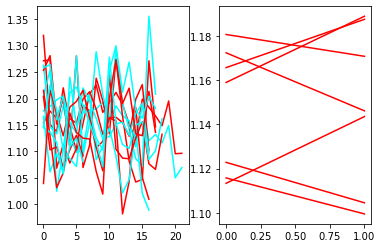

In [2]:
fig, ax = plt.subplots(1,2)

for i,mouse in enumerate(ko_mice):
    print(mouse)
    sess = u.load_single_day(mouse,0,pkl_basedir="/home/mplitt/YMazeSessPkls/HandCurated")
    
    nov_trials = (sess.trial_info['block_number']==5) * (sess.trial_info['LR']==sess.novel_arm)
    baseline_trials = np.zeros(sess.trial_info['block_number'].shape)
    first_trial_last_block = np.argwhere(sess.trial_info['block_number']==5)[0][0]
    print(first_trial_last_block)
    baseline_trials[first_trial_last_block-10:first_trial_last_block]=1
    baseline_trials = baseline_trials>0
    
    F_mat_cre = sess.mcherry_pos_trialmatrix('spks_norm')
    F_mat_notcre = sess.mcherry_neg_trialmatrix('spks_norm')

    denom =  np.nanmean(np.nanmean(F_mat_cre[baseline_trials,:,:],axis=1),axis=0,keepdims=True)
    nov_cre = np.nanmean(F_mat_cre[nov_trials,:,:],axis=1) / denom
    nov_cre = np.nanmean(nov_cre,axis=-1)

#     denom = np.nanmean(np.nanmean(F_mat_notcre[baseline_trials,:,:],axis=1),axis=0,keepdims=True)
#     nov_notcre = np.nanmean(F_mat_notcre[nov_trials,:,:],axis=1) / denom
#     nov_notcre = np.nanmean(nov_notcre,axis=-1)
    
    ax[0].plot(nov_cre, color='red')
    
# for mouse in ctrl_mice:
#     print(mouse)
#     sess = u.load_single_day(mouse,0,pkl_basedir="/home/mplitt/YMazeSessPkls")
    
#     nov_trials = (sess.trial_info['block_number']==5) * (sess.trial_info['LR']==sess.novel_arm)
#     baseline_trials = np.zeros(sess.trial_info['block_number'].shape)
#     first_trial_last_block = np.argwhere(sess.trial_info['block_number']==5)[0][0]
#     print(first_trial_last_block)
#     baseline_trials[first_trial_last_block-10:first_trial_last_block]=1
#     baseline_trials = baseline_trials>0
    
#     F_mat_cre = sess.trial_matrices['spks_norm']
    

#     denom =  np.nanmean(np.nanmean(F_mat_cre[baseline_trials,:,:],axis=1),axis=0,keepdims=True)
#     nov_cre = np.nanmean(F_mat_cre[nov_trials,:,:],axis=1) / denom
#     nov_cre = np.nanmean(nov_cre,axis=-1)

    
#     ax.plot(np.log(nov_cre), color='black')
    
# for mouse in ko_mice:
    print(mouse)
    sess = u.load_single_day(mouse,0,pkl_basedir="/home/mplitt/YMazeSessPkls")
    
    nov_trials = (sess.trial_info['block_number']==5) * (sess.trial_info['LR']==sess.novel_arm)
    baseline_trials = np.zeros(sess.trial_info['block_number'].shape)
    first_trial_last_block = np.argwhere(sess.trial_info['block_number']==5)[0][0]
    print(first_trial_last_block)
    baseline_trials[first_trial_last_block-10:first_trial_last_block]=1
    baseline_trials = baseline_trials>0
    
    F_mat_cre = sess.trial_matrices['spks_norm']
    

    denom =  np.nanmean(np.nanmean(F_mat_cre[baseline_trials,:,:],axis=1),axis=0,keepdims=True)
    _nov_cre = np.nanmean(F_mat_cre[nov_trials,:,:],axis=1) / denom
    _nov_cre = np.nanmean(_nov_cre,axis=-1)

    
    ax[0].plot(_nov_cre, color='cyan')
    
#     ax[1].plot(nov_cre-_nov_cre)
    
    ax[1].plot([nov_cre.mean(),_nov_cre.mean()], c='red')
#     ax[1].scatter(i*.01+1,_nov_cre.mean(),c='red',alpha=.3)

In [3]:
sess = u.load_single_day('Cre7',0,pkl_basedir="/home/mplitt/YMazeSessPkls/HandCurated")

{'date': '18_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0}


In [4]:
print(sess.trial_info.keys(),sess.novel_arm)


dict_keys(['block_number', 'LR']) -1


In [5]:
nov_trials = (sess.trial_info['block_number']==5) * (sess.trial_info['LR']==sess.novel_arm)
baseline_trials = np.zeros(sess.trial_info['block_number'].shape)
first_trial_last_block = np.argwhere(sess.trial_info['block_number']==5)[0][0]
print(first_trial_last_block)
baseline_trials[first_trial_last_block-10:first_trial_last_block]=1
baseline_trials = baseline_trials>0

99


In [6]:
print(nov_trials.sum(),baseline_trials.sum())


19 10


In [7]:
F_mat_cre = sess.mcherry_pos_trialmatrix('spks_norm')
F_mat_notcre = sess.mcherry_neg_trialmatrix('spks_norm')

print(F_mat_cre.shape,F_mat_notcre.shape)

(139, 30, 626) (139, 30, 237)


In [8]:
denom =  np.nanmean(np.nanmean(F_mat_cre[baseline_trials,:,:],axis=1),axis=0,keepdims=True)
nov_cre = np.nanmean(F_mat_cre[nov_trials,:,:],axis=1) / denom
nov_cre = np.nanmean(nov_cre,axis=-1)

denom = np.nanmean(np.nanmean(F_mat_notcre[baseline_trials,:,:],axis=1),axis=0,keepdims=True)
nov_notcre = np.nanmean(F_mat_notcre[nov_trials,:,:],axis=1) / denom
nov_notcre = np.nanmean(nov_notcre,axis=-1)

In [9]:
nov_cre.shape

(19,)

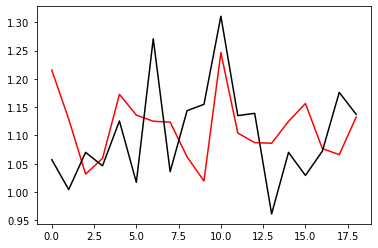

In [10]:
fig, ax = plt.subplots()
ax.plot(nov_cre,color = 'red')
ax.plot(nov_notcre,color='black')

In [29]:
print(nov_cre.mean(),nov_notcre.mean())

1.113356056001073 1.102937885022735
